In [20]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [15]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
# 训练集图片矩阵，代表55000张图片，每张图片为一个向量，其长度为784
mnist.train.images.shape

(55000, 784)

In [9]:
# 训练集标记矩阵，代表55000张图片的标记，每张图片为一个10维的独热编码向量
mnist.train.labels.shape

(55000, 10)

In [10]:
mnist.test.images.shape

(10000, 784)

In [11]:
mnist.test.labels.shape

(10000, 10)

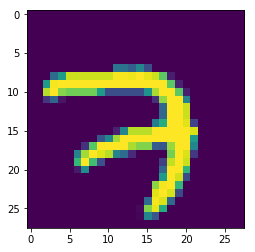

In [16]:
# 可视化训练集中的图片
plt.imshow(Image.fromarray(mnist.train.images[0].reshape(28, 28)))

In [17]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [45]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.0052, acc 0.1087
step   500, loss 10.6275, acc 0.3527
step  1000, loss 7.5889, acc 0.4186
step  1500, loss 6.9451, acc 0.5102
step  2000, loss 7.2876, acc 0.5676
step  2500, loss 5.0457, acc 0.5945
step  3000, loss 6.0507, acc 0.6245
step  3500, loss 6.0495, acc 0.6843
step  4000, loss 4.6930, acc 0.7200
step  4500, loss 3.9358, acc 0.7404
step  5000, loss 3.5523, acc 0.7488
step  5500, loss 3.5896, acc 0.7603
step  6000, loss 4.0652, acc 0.7646
step  6500, loss 3.0222, acc 0.7744
step  7000, loss 4.5414, acc 0.7748
step  7500, loss 3.5276, acc 0.7793
step  8000, loss 3.0332, acc 0.7824
step  8500, loss 5.2548, acc 0.7805
step  9000, loss 2.6073, acc 0.7899
step  9500, loss 2.0148, acc 0.7873
step 10000, loss 3.8695, acc 0.7896
step 10500, loss 2.7537, acc 0.7932
step 11000, loss 3.0344, acc 0.7970
step 11500, loss 3.0037, acc 0.7941
step 12000, loss 1.0237, acc 0.7932
step 12500, loss 2.3657, acc 0.8038
step 13000, loss 5.0561, acc 0.7970
step 13500, loss 2.5188, a